In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Conor\Anaconda3\python.exe
3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Home-PC

In [4]:
import os.path

file_place = r"C:\Users\C\OneDrive"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_data_raw"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\C\\OneDrive\\Breast_data_raw'

In [6]:
import os.path

file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_data_raw"))

In [7]:
Breast_DF.head()

912   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.094676   
                                                              B4    0.094676   
                                                              B4    0.095110   
                                                              B4    0.095979   
                                                              B4    0.097282   

                                                                        916   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.093373   
                                                              B4    0.093808   
                                                              B4    0.093808   
                                                              B4    0.095110   
                                                              B4    0.095979   

                                                                        920   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095110   
                                                              B4    0.095110   
                                                              B4    0.095545   
                                                              B4    0.096848   
                                                              B4    0.097716   

                                                                        924   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095545   
                                                              B4    0.095545   
                                                              B4    0.095979   
                                                              B4    0.097282   
                                                              B4    0.099019   

                                                                        928   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.096848   
                                                              B4    0.096848   
                                                              B4    0.097282   
                                                              B4    0.098151   
                                                              B4    0.099888   

                                                                        932   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.097282   
                                                              B4    0.097282   
                                                              B4    0.097716   
                                                              B4    0.099019   
                                                              B4    0.100322   

                                                                        936   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095979   
                                                              B4    0.096848   
                                                              B4    0.096848   
                                                              B4    0.097716   
                                                              B4    0.099019   

                                                                        940   \
Sex Type      Stage Pathology                 Grade Label Age Cor

# Preprocessing

Preprocessing method, maybe make this all one pipe?

In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

steps = [
         #("Normalise", Normalizer(norm = "l1"))
         ("RobustScaler", RobustScaler())
        ]

pipe  = Pipeline(steps)

In [9]:
import Tissue_Analysis_Tools as TAT

PCA_NR_Components = 50

dataframe = TAT.process_data(Breast_DF, paraffin = (1340,1490), balance = "Label")

PCA_reduced = TAT.PCA_denoise(dataframe, PCA_NR_Components)

values = pipe.fit_transform(PCA_reduced.T).T

Breast_DF_P = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

Processing


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Analysis

In [10]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()
lb = LabelBinarizer()

DATA = Breast_DF_P.sample(10000)

y_label = "Stage"

X = DATA
Y = DATA.reset_index()[y_label]
lb.fit(Y)
Y_b = lb.transform(Y)

In [11]:
DATA.reset_index()["Label"].value_counts()

Malignant Stroma            1730
Non_malignant Epithelium    1717
Malignant Epithelium        1674
Non_malignant Stroma        1672
Necrosis                    1618
Blood                       1589
Name: Label, dtype: int64

C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


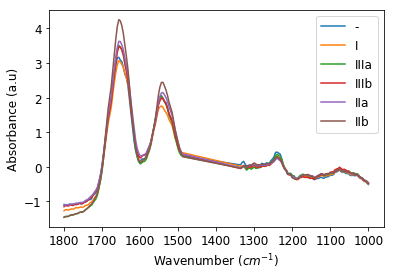

In [12]:
plt.clf()

for name, df in Breast_DF_P.groupby(level = y_label):
    
    plt.plot(df.mean(axis = 0), label = name)

plt.ylabel("Absorbance (a.u)")
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [13]:
param_dict = {"NAT": {'colsample_bytree': 0.5344632970043641, 'learning_rate': 0.06617275235998737, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 450, 'subsample': 0.470587311790687}
             ,"Malignant": {'colsample_bytree': 0.5874930803453049, 'learning_rate': 0.07747354115336803, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 434, 'subsample': 0.5507688768113341}
             ,"Normal": {'colsample_bytree': 0.5534332713214647, 'learning_rate': 0.06321150495968879, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 453, 'subsample': 0.5748281161442726}}

In [14]:
import xgboost as xgb

In [15]:
binary_classifiers = dict()

for i, name in enumerate(np.unique(Y)):

    # Find out the ratio of positive classes to negative to scale positive weights.
    # Allows for compensation of unbalanced classes without throwing away data.

    pos_ratio = 1/(np.sum(Y_b[:,i])/Y_b[:,i].shape[0])

    clf_xgb = xgb.XGBClassifier(objective = "binary:logistic", early_stopping_rounds = 10, n_classes = 2, n_jobs = -1, scale_pos_weight = pos_ratio)
    
    # Set the parameters which are best for that particular class
    #clf_xgb.set_params(**param_dict[name])
    clf_xgb.fit(X.values,Y_b[:,i])
    
    print("Trained: {}".format(name))

    binary_classifiers[name] = clf_xgb

Trained: -
Trained: I
Trained: IIIa
Trained: IIIb
Trained: IIa
Trained: IIb


# HyperOpt Training

In [20]:
DATA.head(1)

,,,,,,,,1000,1004,1008,1012,1016,1020,1024,1028,1032,1036,...,1764,1768,1772,1776,1780,1784,1788,1792,1796,1800
Sex,Type,Stage,Pathology,Grade,Label,Age,Core,,,,,,,,,,,,,,,,,,,,,
F,NAT,-,Cancer adjacent normal breast tissue,-,Non_malignant Epithelium,46,M10,-0.374326,-0.341889,-0.296514,-0.293306,-0.255273,-0.204713,-0.19158,-0.147079,-0.115042,-0.107995,...,-1.022194,-1.056702,-1.018922,-1.04396,-1.09481,-1.053039,-1.040637,-1.083488,-1.048475,-1.028867


In [305]:
Y_b[:,0]

array([1, 0, 0, ..., 0, 0, 0])

In [53]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

This will ouput a score for the current hyperparameter configuration 

In [61]:
%time

binary_classifiers = dict()

for i, name in enumerate(np.unique(Y)):
    
    best_hyperparams = optimise(X.values, Y_b[:,i]
                                , weight_binary = True
                                , optimiser = tpe.suggest
                                , random_state = 42
                                , cores = 1)
                                #, trials = Trials())
    
    ## TODO: append best classifier to dictionary, store any other
    ## relevant variables with it.
    
    print(best_hyperparams)
    
    print("Trained: {}".format(name))
    
    break

    binary_classifiers[name] = clf_xgb

Wall time: 0 ns


NameError: name 'score' is not defined

In [243]:
def score(params):

    dtrain = xgb.DMatrix(train_features, label=y_train)
    dvalid = xgb.DMatrix(valid_features, label=y_valid)
    
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    
    xgb_cl = xgb.fit(params, dtrain, num_round,
                          evals=watchlist,
                          verbose_eval=True)
    
    predictions = xgb_cl.predict(dvalid, ntree_limit=gbm_model.best_iteration + 1)
    score = roc_auc_score(y_valid, predictions)
    
    print("\tScore {0}\n\n".format(score))

    loss = 1 - score
    
    return {'loss': loss, 'status': STATUS_OK}

This function is used to optimise the hyperparameters of XGboost

In [60]:
def optimise(X, y, weight_binary = False, optimiser = tpe.suggest, random_state = 42, cores = 1):
    """
    This is the optimization function that given a space (space here) of 
    hyperparameters and a scoring function (score here), finds the best hyperparameters.
    """
    # To learn more about XGBoost parameters, head to this page: 
    # https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': cores,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    
    # Optional argument to weight positive cases when using unbalanced data
    if weight_binary:
        
        space["scale_pos_weight"] = 1/(np.sum(y)/y.shape[0])
    
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=5)
    return best

# Importing Breast Cancer data

In [16]:
from sklearn.preprocessing import normalize

def import_image(original):
    
    image = original.reshape(original.shape[-1], -1)

    return normalize(image, axis = 0, norm = "l1").reshape(original.shape)

In [22]:
import os
from scipy.io import loadmat

file_place = r"B:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"B:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'B:\\Breast Cancer Data\\br20832_cores\\br20832_cores'

In [23]:
import os
from scipy.io import loadmat

file_place = "/mnt/hgfs/E/Breast Cancer Data/br20832_cores/br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = "/mnt/hgfs/E/Breast Cancer Data/overlay/overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/mnt/hgfs/E/Breast Cancer Data/br20832_cores/br20832_cores'

In [17]:
import os
from scipy.io import loadmat
import imageio

file_place = r"E:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"E:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

#overlays = {image_list[:-4] : imageio.imread(os.path.join(image_list_directory, image_name)) for image_name in image_list}

images = {file_name[:-4] : loadmat(os.path.join(file_place, file_name))["image"] for file_name in file_list[:10]}

In [18]:
images.keys()

dict_keys(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A2', 'A3'])

# Preprocess image

In [19]:
image_ref = "A1"

image = images[image_ref]
#overlay = 

PCA_NR_Components = 10

image_dataframe = pd.DataFrame(image.reshape(-1, image.shape[-1]), columns = Breast_DF.columns)

dataframe = TAT.process_data(image_dataframe, paraffin = (1340,1490))

PCA_reduced = TAT.PCA_denoise(dataframe, PCA_NR_Components)

values = pipe.fit_transform(PCA_reduced.T).T

image_P_list = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

image_P = image_P_list.values.reshape(image.shape[0], image.shape[1], -1)

Processing


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Plotting predictions for image

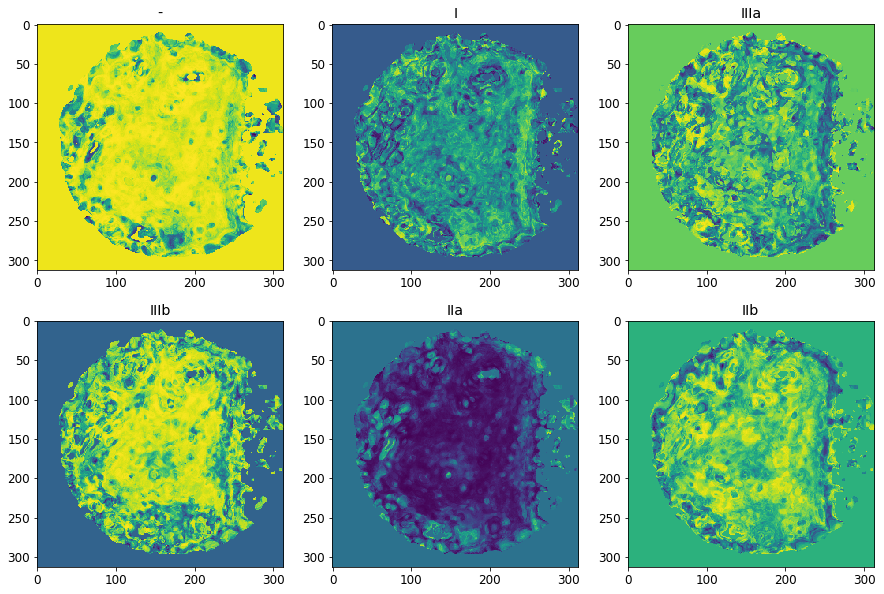

In [44]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (15,10))

pred_cube = individual_predictions(image_P, binary_classifiers)

for ax, name, image in zip(axes.flat, pred_cube.keys(), pred_cube.values()):
    
    ax.set_title(name)
    ax.imshow(image)
    
plt.show()

In [27]:
import matplotlib as mpl

def individual_predictions(image, classifiers):
    
    Pred_cube = {name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,0].reshape(image.shape[0], image.shape[1]) for name, classifier in classifiers.items()}
    
    return Pred_cube

def prediction_plot(image, classifiers, **kwargs):
    
    # Get colours from tab10 colour list
    colours = dict(zip(classifiers.keys(), plt.get_cmap("tab10").colors))
    
    # Prediction values for each 
    Pred_DF = pd.DataFrame({name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,0] for name, classifier in classifiers.items()})

    Pred_DF["Winner_ID"] = Pred_DF.idxmax(axis = 1)
    Pred_DF["Winner_conf"] = Pred_DF.max(axis = 1)

    # RGB image
    RGB = np.array([colours[ID] for ID in Pred_DF["Winner_ID"]]).reshape(image.shape[0], image.shape[1], 3)
    
    # Confidence plot
    conf = Pred_DF["Winner_conf"].values.reshape(image.shape[0], image.shape[1], 1)
    
    # RGBA plot
    rgba = np.concatenate([RGB,conf], axis = 2)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', list(colours.values()), N = len(colours))
    
    # If a threshold is supplied, use it
    if "thresh" in kwargs.keys():
        rgba[np.abs(image_P.mean(axis = 2)) < kwargs.get("thresh")] = [0,0,0,0]
        
    fig, ax = plt.subplots()
    cax = ax.imshow(rgba, cmap = cmap)
    cbar = fig.colorbar(cax, ticks = np.linspace(0, 1, len(classifiers)))
    cbar.ax.set_yticklabels(classifiers.keys())  # horizontal colorbar
    
    return rgba, conf.reshape(conf.shape[0],conf.shape[1])

In [21]:
from skimage.filters import threshold_otsu

C:\Users\Conor\Anaconda3\lib\site-packages\skimage\__init__.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Conor\\Anaconda3\\lib\\site-packages\\pytest.py' mode='r' encoding='utf-8'>
  imp.find_module('pytest')
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


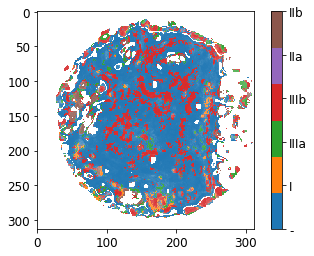

In [22]:
rgba, conf = prediction_plot(image_P, binary_classifiers, thresh = threshold_otsu(image_P.mean(axis = 2)))

C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


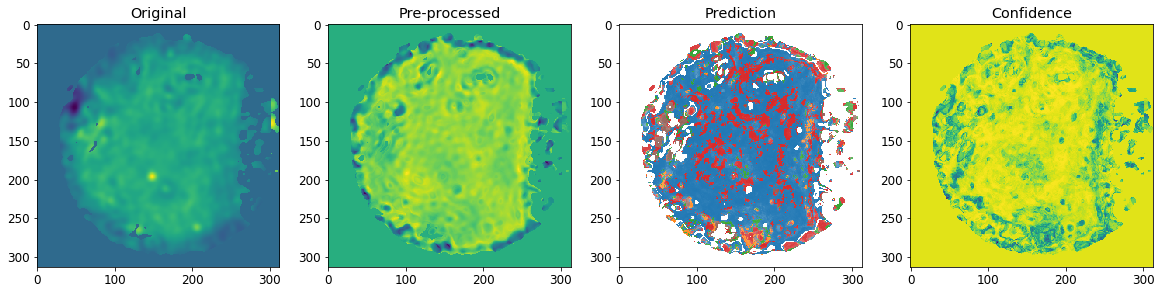

In [23]:
fig, axes = plt.subplots(ncols = 4, nrows = 1, figsize = (20,10))

titles = ["Original", "Pre-processed", "Prediction", "Confidence"]
images_ = [image.mean(axis = 2)
          , image_P.mean(axis = 2)
          , rgba
          , conf]

for title, ax, image_ in zip(titles, axes, images_):
    
    ax.imshow(image_)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_title(title)
    
plt.show()